In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('tvmarketing.csv')

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(200, 2)

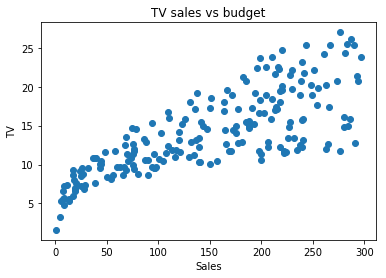

In [6]:
plt.scatter(df.TV, df.Sales)
plt.title('TV sales vs budget')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

In [7]:
x = df.TV
y = df.Sales

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 100)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
x_train = np.array(x_train)
x_train.shape

(140,)

In [11]:
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]

In [12]:
x_train.shape

(140, 1)

In [13]:
from sklearn.linear_model import LinearRegression as lr

In [14]:
model = lr()

In [15]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(model.coef_)
print(model.intercept_)

[[0.04649736]]
[6.98966586]


In [17]:
x_test = x_test[:, np.newaxis]
# making the dimmentions of the test value array compatible for predict function

In [18]:
# predicted values according to the model
y_pre = model.predict(x_test)

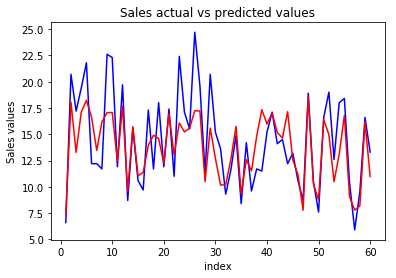

In [19]:
# lets now plot a contrasting graph between the actual and the predicted values
fig = plt.figure()
# lets first generate the x axis values as indices
indices = [x for x in range (1,len(x_test)+1)]
plt.plot(indices, y_test, color = 'blue')
plt.plot(indices, y_pre, color = 'red')
plt.xlabel('index')
plt.ylabel('Sales values')
plt.title('Sales actual vs predicted values')
plt.show()
# here you can see that the difference between the predicted and the actual value is not so great... hence our model is good

In [20]:
print(y_pre.shape)
y_test  = y_test[:, np.newaxis]
print(y_test.shape)

(60, 1)
(60, 1)


In [21]:
error = y_test - y_pre

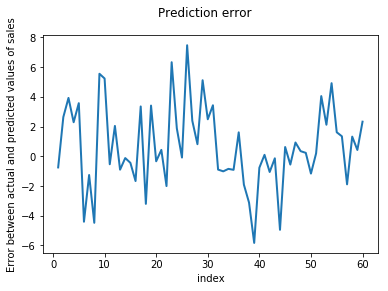

In [22]:
# lets now plot the error function with indices
plt.plot(indices, error, linewidth = 2)
plt.xlabel('index')
plt.ylabel('Error between actual and predicted values of sales')
plt.suptitle('Prediction error')
plt.show()
# here we cans ee that the greatest error is of approx. 7.7 

In [23]:
# now lets calculate the model error parametres
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
ms_error = mean_squared_error(y_test, y_pre)
rs_error = r2_score(y_test, y_pre)

In [25]:
print(ms_error)
print(rs_error)

7.97579853285485
0.5942987267783302


In [26]:
# as the r squared error is approx 60% , so we can say that its a good model

In [27]:
# now lets compare our predicted plot and actual plot
x = x[:,np.newaxis]
y_predicted = model.predict(x)

Text(0.5,1,'Predicted sales vs advertisement')

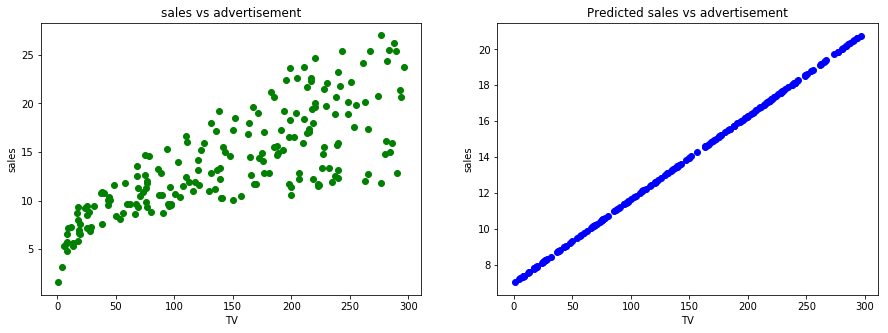

In [28]:
# lets now plot both the graps side by side in the same figure
plt.figure(1, figsize = (15,5))

# subplot 1 -- original values
plt.subplot(1,2,1)
plt.scatter(x,y, color = 'green')
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('sales vs advertisement')

#subplot 2 -- predicted plot
plt.subplot(1,2,2)
plt.scatter(x,y_predicted, color = 'blue')
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Predicted sales vs advertisement')

Text(0.5,1,'sales vs advertisement')

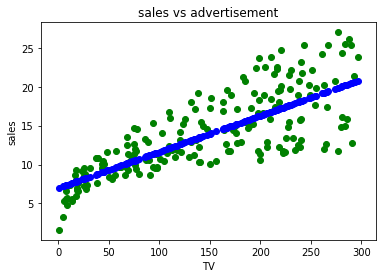

In [29]:
# lest see both the plots on the same graph fr better comparision

plt.scatter(x,y, color = 'green')
plt.scatter(x,y_predicted, color = 'blue')
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('sales vs advertisement')


In [30]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'